<a href="https://colab.research.google.com/github/RaisB17/deep_learning/blob/main/week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from sklearn.impute import SimpleImputer
from tensorflow.keras.callbacks import EarlyStopping
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/Dataset/secondhanddataset.csv')

# Explore Data

In [ ]:
data

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [ ]:
data.select_dtypes(include=np.number).corr()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
v.id,1.000000,-0.029926,-0.030787,-0.034255,0.047400,-0.018263,-0.038548,0.047137,0.001613,-0.006997,-0.000632,-0.059460
on road old,-0.029926,1.000000,0.034113,0.007207,0.007488,-0.050717,-0.015682,-0.030097,-0.023816,-0.049266,0.008950,0.233035
on road now,-0.030787,0.034113,1.000000,0.004609,-0.053202,0.028280,-0.005043,-0.015880,0.012699,-0.012719,0.017955,0.282793
years,-0.034255,0.007207,0.004609,1.000000,-0.002089,0.027285,0.053579,0.050220,0.025148,-0.003272,0.028859,-0.011854
km,0.047400,0.007488,-0.053202,-0.002089,1.000000,-0.039930,-0.013640,0.032680,0.026450,-0.052918,0.013566,-0.935924
rating,-0.018263,-0.050717,0.028280,0.027285,-0.039930,1.000000,0.015943,-0.009757,-0.042222,-0.022623,0.004408,0.035038
condition,-0.038548,-0.015682,-0.005043,0.053579,-0.013640,0.015943,1.000000,0.058788,0.018472,-0.071552,0.047805,0.110108
economy,0.047137,-0.030097,-0.015880,0.050220,0.032680,-0.009757,0.058788,1.000000,-0.059402,-0.016782,0.041632,-0.034711
top speed,0.001613,-0.023816,0.012699,0.025148,0.026450,-0.042222,0.018472,-0.059402,1.000000,0.057827,-0.019697,-0.027993
hp,-0.006997,-0.049266,-0.012719,-0.003272,-0.052918,-0.022623,-0.071552,-0.016782,0.057827,1.000000,-0.013817,0.030238


In [ ]:
data.duplicated().sum()

np.int64(0)

<Axes: >

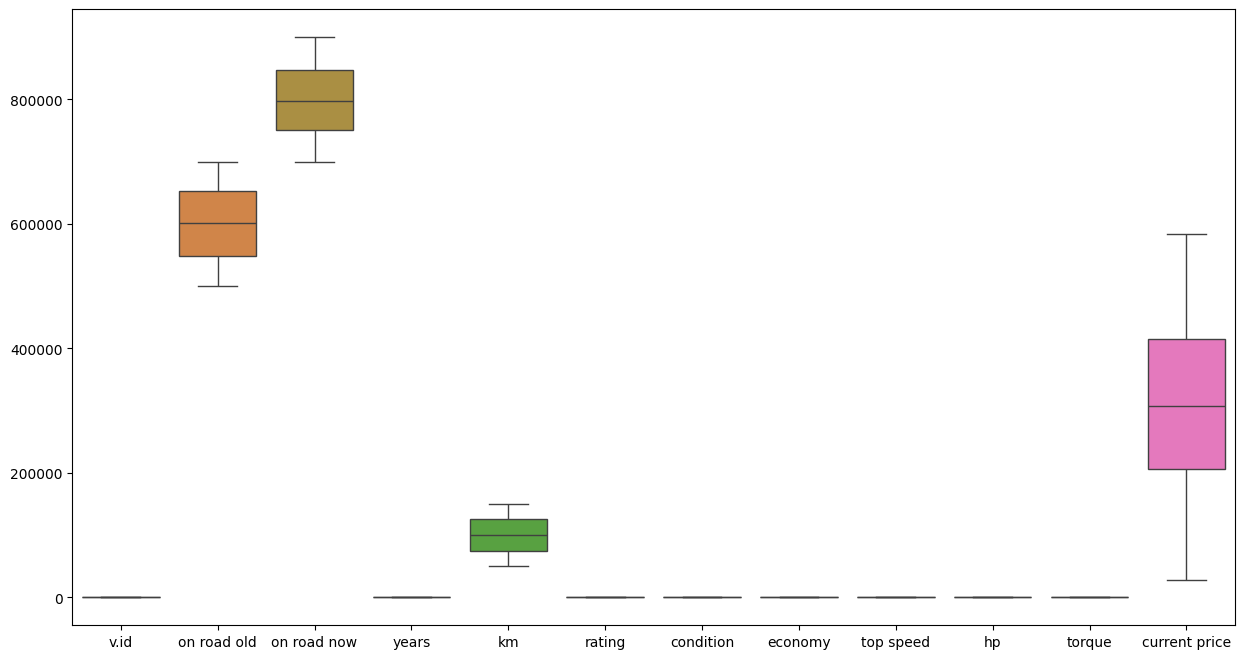

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data)

In [ ]:
X = data.select_dtypes(include=np.number).drop('current price',axis=1)
y = data['current price']

In [ ]:
y

,current price
0,351318.0
1,285001.5
2,215386.0
3,244295.5
4,531114.5
...,...
995,190744.0
996,419748.0
997,405871.0
998,74398.0


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

y_scaler = StandardScaler()

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test = y_scaler.transform(y_test.reshape(-1, 1)).ravel()

In [ ]:
X_train.shape[1]

11

In [ ]:
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)

NameError: name 'X_train' is not defined

# Tensorflow regresi

In [ ]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)
model = tf.keras.Model(inputs, outputs)
earlystopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, batch_size = 32, validation_split = 0.15, epochs = 300, callbacks =[earlystopping] )


NameError: name 'X_train' is not defined

In [ ]:
y_pred = model.predict(X_test)

rmse = np.sqrt(model.evaluate(X_test, y_test))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)

NameError: name 'model' is not defined

# Pytorch regresi

In [ ]:
class MLPRegression(nn.Module):
    def __init__(self, input_size, hidden_sizes=[64, 32], dropout=0.2):
        super(MLPRegression, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.bn1 = nn.BatchNorm1d(hidden_sizes[0])  # Normalisasi
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.bn2 = nn.BatchNorm1d(hidden_sizes[1])
        self.out = nn.Linear(hidden_sizes[1], 1)  # Output untuk regresi
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.out(x)  # Tanpa aktivasi (output tetap nilai kontinu)
        return x

# Inisialisasi model
input_size = X_train.shape[1]
mlp_reg = MLPRegression(input_size)

NameError: name 'nn' is not defined

In [ ]:
X_train = torch.tensor( X_train, dtype=torch.float32)
y_train = torch.tensor( y_train, dtype=torch.float32).view(-1,1)

X_test = torch.tensor( X_test, dtype=torch.float32)
y_test = torch.tensor( y_test, dtype=torch.float32).view(-1,1)

In [ ]:
optimizer = optim.Adam(mlp_class_softmax.parameters(), lr=0.0005)
criterion = nn.MSELoss()

NameError: name 'mlp_class_softmax' is not defined

In [ ]:
# DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Early Stopping Setup
best_loss = float('inf')
patience = 5
counter = 0


# Training Loop
for epoch in range(300):
    mlp_reg.train()  # Set mode training
    total_loss = 0
    for x, target in train_loader:
        optimizer.zero_grad()
        output = mlp_reg(x)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}: Loss = {avg_loss:.6f}")

    if avg_loss < best_loss:
        best_loss = avg_loss
        best_model = mlp_reg.state_dict()
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            mlp_reg.load_state_dict(best_model)
            break


In [ ]:
mlp_reg.eval()  # Mode evaluasi
y_pred_list, y_true_list = [], []

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

with torch.no_grad():  # Nonaktifkan grad untuk evaluasi
    for x_batch, y_batch in test_loader:
        output = mlp_reg(x_batch)  # Model menghasilkan prediksi

        # Untuk regresi, hasil langsung digunakan tanpa thresholding
        y_pred = output.squeeze()  # Hilangkan dimensi ekstra jika ada

        y_pred_list.extend(y_pred.cpu().numpy())
        y_true_list.extend(y_batch.cpu().numpy())

# Konversi ke NumPy
y_pred_array = np.array(y_pred_list)
y_true_array = np.array(y_true_list)

In [ ]:
print("RMSE:", np.sqrt(mean_squared_error(y_true_array, y_pred_array)))
print("R2 Score:", r2_score(y_true_array, y_pred_array))

1. Mean Squared Error (MSE)
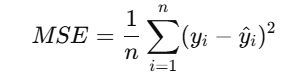

-Mengukur rata-rata dari kuadrat kesalahan antara nilai aktual (y) dan prediksi (ŷ).
-Makin kecil nilai MSE, makin baik modelnya.

2.Root Mean Squared Error (RMSE)
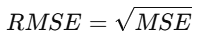

-Akar dari MSE, memberikan kesalahan dalam satuan yang sama dengan target.
-RMSE lebih sensitif terhadap outlier dibanding MSE

3. R-Squared (R²)

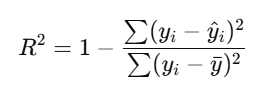

-Mengukur seberapa baik model menjelaskan variabilitas data.
-Nilai R² = 1 berarti prediksi sempurna, R² = 0 berarti prediksi tidak lebih baik dari rata-rata.

kesimpulan
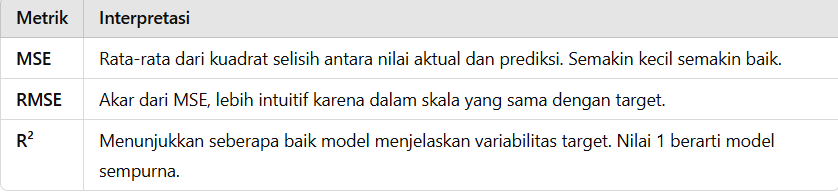






# tensorflow klasifikasi

In [ ]:

data = pd.read_csv('https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/Dataset/compressed_data.csv.gz', compression='gzip')

In [ ]:
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,1,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,1,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,1,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,1,0,3


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.isnull().sum()

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


In [ ]:
data.select_dtypes(include=np.number).corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,...,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612,0.238164,0.066550,-0.619374,-0.269554
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,...,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866,0.055988,0.074904,0.082687,0.017080
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,...,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637,-0.036253,0.125663,0.255503,0.148285
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,...,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020,0.055726,0.122028,-0.100433,-0.020317
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,...,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006,-0.008709,0.146839,0.077792,0.081664
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,...,-0.003000,0.007550,0.016313,0.079778,0.033762,0.016052,-0.200411,-0.232933,-0.270349,-0.153450
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,...,0.027870,0.007865,0.010332,0.015108,-0.029620,-0.000016,-0.006181,-0.100565,-0.200282,-0.035415
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,...,0.005863,0.016239,-0.022707,0.042952,-0.071961,-0.040176,0.042392,0.048646,-0.195733,-0.096426
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,...,-0.016482,0.001330,-0.022064,0.022187,-0.029040,-0.024254,0.034707,0.090757,0.018860,-0.048290
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,...,-0.000081,-0.010595,0.004180,-0.019740,-0.003301,0.008915,0.027473,-0.277510,-0.236548,-0.108936


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Soil_Type1                          581012 non-null 

In [ ]:
data['Cover_Type'].unique()

array([5, 2, 1, 7, 3, 6, 4])

In [ ]:
encoder = LabelEncoder()
data = data.apply(encoder.fit_transform)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Soil_Type1                          581012 non-null 

In [ ]:
data.select_dtypes(include=np.number).corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
Elevation,1.000000,0.015733,-0.242707,0.297298,0.093424,0.343977,0.112225,0.206004,0.059147,0.118206,...,0.083011,0.021109,0.035435,0.217193,0.193607,0.212488,0.238180,0.066534,-0.619400,-0.269627
Aspect,0.015733,1.000000,0.078728,0.021243,0.070190,0.027311,-0.579398,0.336230,0.646944,-0.104461,...,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866,0.055988,0.074904,0.082687,0.017080
Slope,-0.242707,0.078728,1.000000,-0.024300,0.275040,-0.209963,-0.327127,-0.526847,-0.175854,-0.180400,...,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637,-0.036253,0.125663,0.255503,0.148285
Horizontal_Distance_To_Hydrology,0.297298,0.021243,-0.024300,1.000000,0.583438,0.073119,-0.024815,0.056253,0.057523,0.036729,...,0.003420,0.040207,-0.002985,0.056851,0.022170,0.159404,0.047593,0.134370,-0.098067,-0.004328
Vertical_Distance_To_Hydrology,0.093424,0.070190,0.275040,0.583438,1.000000,-0.044694,-0.166032,-0.111184,0.034536,-0.073528,...,-0.006091,0.012979,-0.007528,-0.008610,0.043962,0.179323,-0.008673,0.146852,0.077971,0.081805
Horizontal_Distance_To_Roadways,0.343977,0.027311,-0.209963,0.073119,-0.044694,1.000000,0.032115,0.182350,0.102948,0.325162,...,-0.007397,0.006469,0.015051,0.076753,0.025009,0.010772,-0.188858,-0.264418,-0.242950,-0.146330
Hillshade_9am,0.112225,-0.579398,-0.327127,-0.024815,-0.166032,0.032115,1.000000,0.009869,-0.780430,0.126302,...,0.027876,0.007867,0.010334,0.015105,-0.029635,-0.000021,-0.006192,-0.100548,-0.200350,-0.035407
Hillshade_Noon,0.206004,0.336230,-0.526847,0.056253,-0.111184,0.182350,0.009869,1.000000,0.594378,0.054735,...,0.005862,0.016246,-0.022719,0.042963,-0.072005,-0.040202,0.042400,0.048728,-0.195843,-0.096476
Hillshade_3pm,0.059147,0.646944,-0.175854,0.057523,0.034536,0.102948,-0.780430,0.594378,1.000000,-0.045335,...,-0.016482,0.001330,-0.022064,0.022187,-0.029040,-0.024254,0.034707,0.090757,0.018860,-0.048290
Horizontal_Distance_To_Fire_Points,0.118206,-0.104461,-0.180400,0.036729,-0.073528,0.325162,0.126302,0.054735,-0.045335,1.000000,...,0.000985,-0.010295,0.002144,-0.018277,-0.008062,0.003651,0.026926,-0.289468,-0.207566,-0.100446


In [ ]:
X = data.select_dtypes(include=np.number).drop('Cover_Type', axis=1)
y = data['Cover_Type']

In [ ]:
y

In [ ]:
Counter(y)

Counter({4: 9493, 1: 283301, 0: 211840, 6: 20510, 2: 35754, 5: 17367, 3: 2747})

In [ ]:
undersample = RandomUnderSampler(sampling_strategy={0: 30000, 1: 30000, 2: 30000})
X_under, y_under = undersample.fit_resample(X, y)

oversample = SMOTE(sampling_strategy={3: 30000, 4: 30000, 5: 30000, 6: 30000})
X_resampled, y_resampled = oversample.fit_resample(X_under, y_under)

Counter(y_resampled)

Counter({0: 30000, 1: 30000, 2: 30000, 3: 30000, 4: 30000, 5: 30000, 6: 30000})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_scaler = StandardScaler()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
y_train.shape

(168000,)

In [ ]:
X_train.shape

(168000, 54)

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [ ]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs = tf.keras.layers.Dense(7, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)
earlystopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size = 256, validation_split = 0.15, epochs = 100, callbacks =[earlystopping] )

Epoch 1/100
558/558 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4860 - loss: 8.6254 - val_accuracy: 0.6844 - val_loss: 0.9452
Epoch 2/100
558/558 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6851 - loss: 0.8976 - val_accuracy: 0.7261 - val_loss: 0.7844
Epoch 3/100
558/558 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7220 - loss: 0.7629 - val_accuracy: 0.7615 - val_loss: 0.6678
Epoch 4/100
558/558 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7358 - loss: 0.7378 - val_accuracy: 0.7748 - val_loss: 0.5810
Epoch 5/100
558/558 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7646 - loss: 0.6282 - val_accuracy: 0.7937 - val_loss: 0.5306
Epoch 6/100
558/558 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7771 - loss: 0.5824 - val_accuracy: 0.7807 - val_loss: 0.5629
Epoch 7/100
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7832 - loss: 0.5576 - val_accuracy: 0.7890 - val_loss: 0.5477
Epoch 8/100
558/558 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7928 - loss: 0.5311 - val_accu

In [ ]:
y_pred

array([5, 3, 2, ..., 5, 2, 5])

In [ ]:
from sklearn.preprocessing import label_binarize

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Accuracy: 0.8821
Precision: 0.8809
Recall: 0.8821
F1-score: 0.8793
AUC: 0.9877


In [ ]:
class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, num_classes)  # Output sesuai jumlah kelas

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x


In [ ]:
X_train = torch.tensor(X_train.values, dtype=torch.float32)  # Convert DataFrame to NumPy array
y_train = torch.tensor(y_train, dtype=torch.long)  # Pastikan y_train dalam format long

X_test = torch.tensor(X_test.values, dtype=torch.float32)  # Convert DataFrame to NumPy array
y_test = torch.tensor(y_test, dtype=torch.long)  # Pastikan y_test juga dalam format long

In [ ]:
num_classes = len(np.unique(y_train))
model = NN(X_train.shape[1], num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

In [ ]:
# DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

best_val_loss = float("inf")
patience = 5
patience_counter = 0

# Training Loop dengan Early Stopping
for epoch in range(500):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)

    # Early Stopping Logic
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        patience_counter = 0
        best_model_state = model.state_dict()
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print(f"Early stopping at epoch {epoch}")
        break

    # Print loss setiap 10 epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}")

# Load best model
model.load_state_dict(best_model_state)


Epoch 0, Training Loss: 0.5301811695098877, Validation Loss: 0.5363603234291077
Epoch 10, Training Loss: 0.5272806286811829, Validation Loss: 0.5343366265296936
Epoch 20, Training Loss: 0.5232710242271423, Validation Loss: 0.5307542085647583
Epoch 30, Training Loss: 0.5199205875396729, Validation Loss: 0.5268532633781433
Epoch 40, Training Loss: 0.5183164477348328, Validation Loss: 0.5261176228523254
Epoch 50, Training Loss: 0.5138311982154846, Validation Loss: 0.5213716626167297
Early stopping at epoch 55


<All keys matched successfully>

In [ ]:
# Evaluasi Model
model.eval()
y_pred_list, y_true_list = [], []

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        output = model(X_batch)

        # Get predicted class labels (instead of binary values)
        _, y_pred = torch.max(output, 1)  # Get index of max probability

        y_pred_list.extend(y_pred.cpu().numpy())
        y_true_list.extend(y_batch.cpu().numpy())

# Konversi ke NumPy untuk evaluasi
y_pred_array = np.array(y_pred_list)
y_true_array = np.array(y_true_list)

# Evaluasi Metrik
accuracy = accuracy_score(y_true_array, y_pred_array)
precision = precision_score(y_true_array, y_pred_array, average='weighted')
recall = recall_score(y_true_array, y_pred_array, average='weighted')
f1 = f1_score(y_true_array, y_pred_array, average='weighted')
#auc = roc_auc_score(y_true_array, y_pred_array, multi_class='ovr')  # Use predicted probabilities for AUC

# Cetak hasil evaluasi
print(f"Akurasi  : {accuracy:.4f}")
print(f"Presisi  : {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
#print(f"AUC-ROC  : {auc:.4f}")  # Print AUC if calculated

Akurasi  : 0.7930
Presisi  : 0.7869
Recall   : 0.7930
F1 Score : 0.7881


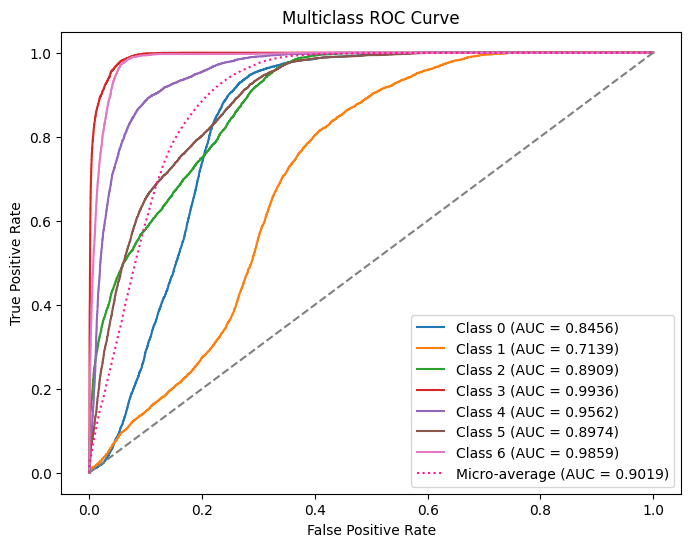

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_probs = model(X_test).detach().cpu().numpy()

# Binarize the true labels for multiclass ROC curve calculation
y_true_bin = label_binarize(y_true_array, classes=np.unique(y_true_array))

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_true_bin.shape[1]  # Number of classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_pred_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class and micro-average
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.4f})")

plt.plot(fpr["micro"], tpr["micro"], label=f"Micro-average (AUC = {roc_auc['micro']:.4f})", color="deeppink", linestyle=":")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()

1. Akurasi (Accuracy)
Akurasi mengukur persentase prediksi yang benar dari seluruh data.
🔹 Cocok untuk: dataset seimbang dengan jumlah kelas yang hampir sama.
🔹 Formula:

Accuracy = Jumlah Prediksi Benar/total sampel

2. Presisi (Precision)
Presisi mengukur berapa banyak prediksi positif yang benar dibandingkan total prediksi positif.
🔹 Cocok untuk: dataset tidak seimbang (banyak negatif, sedikit positif).
🔹 Formula:
precision = true positives(tp)/true positives(tp)+false positives(fp)

3. Recall (Sensitivity)
Recall mengukur berapa banyak kelas positif yang benar terdeteksi dibandingkan jumlah kelas positif yang sebenarnya.
🔹 Cocok untuk: kasus di mana penting untuk menangkap semua positif (misalnya deteksi penyakit).
🔹 Formula:
recall = true positives(tp)/true positives(tp)+false negatives(fn)

4. F1-Score
F1-Score adalah rata-rata harmonis dari precision dan recall, yang lebih baik digunakan jika dataset tidak seimbang.
🔹 Formula:
f1 = 2 x (precision x recall)/(precision+recall)

5. Confusion Matrix
Confusion matrix menunjukkan jumlah prediksi yang benar dan salah dalam setiap kelas.
🔹 Cocok untuk: memahami kesalahan model dalam setiap kelas.

6. AUC-ROC (Area Under Curve - Receiver Operating Characteristic)
AUC-ROC digunakan untuk mengevaluasi kemampuan model membedakan antara kelas positif dan negatif.
🔹 Cocok untuk: klasifikasi biner dan dataset tidak seimbang.

7. Log-Loss (Logarithmic Loss)
Log-loss menghitung seberapa jauh probabilitas prediksi dari label yang benar.
🔹 Cocok untuk: mengevaluasi model probabilistik.
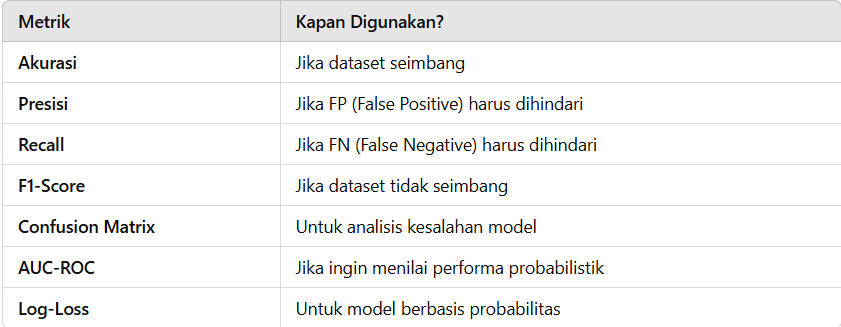